# Introduction

I participated in this competition in order to learn new techniques about data cleaning and modelling. In this dataset, we have many columns that need cleaning and preprocessing. In this notebook, I have used efficient ways of data cleaning without using multiple line of codes, used different visualization to find problems within dataset.
This dataset was started a few years back on kaggle, data can be found at [this link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).
In this dataset, we have 81 columns including dependent variable which is SalePrice and 79 explanatory variables as we have id column which is not relevant for our analysis so we will drop this column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm, skew, kurtosis
import math
from scipy.special import boxcox1p
from mlxtend.regressor import StackingCVRegressor
import warnings
warnings.filterwarnings('ignore')
sns.set_style()
%matplotlib inline

C:\Users\uzair\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Set working directory and Increase the number of columns to be Displayed
I will set the working directory.

In [2]:
os.chdir('C:\\Users\\uzair\\Codes\\Advanced Regression')
pd.set_option('display.max_columns', 500)

## Import the dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## View the dataset

In [4]:
print(f'Train Dataset information : Number of Rows:{train.shape[0]}, Number of Columns:{train.shape[1]}')
print(f'Test Dataset information : Number of Rows:{test.shape[0]}, Number of Columns:{test.shape[1]}')

Train Dataset information : Number of Rows:1460, Number of Columns:81
Test Dataset information : Number of Rows:1459, Number of Columns:80


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see that we have categorical variables that need to be converted into numbers/integers. We will create dummy variables and use Label encoding to convert them into numeric columns.

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_ids = train['Id']
test_ids = test['Id']
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

## Exploratory Data Analysis And Data Cleaning

### Data Exploration

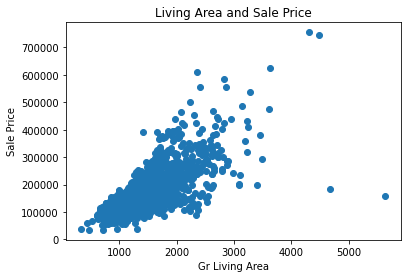

In [8]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.title('Living Area and Sale Price')
plt.xlabel('Gr Living Area')
plt.ylabel('Sale Price')
plt.show()

We can see two extreme values i.e. two big houses with extremely low sale price, which seems odd. Lets explore these rows and remove them

In [9]:
train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Looking at the above observations, we can clearly see that something is wrong with these two houses. These two houses are big but the saleprice is very low. I will simply remove these rows so that we dont have any extreme values.

In [10]:
## remove outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

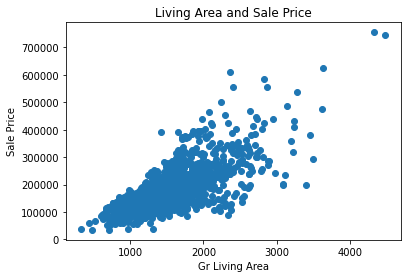

In [11]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.title('Living Area and Sale Price')
plt.xlabel('Gr Living Area')
plt.ylabel('Sale Price')
plt.show()

Now our data looks better, we still have outliers but we will keep those values in our data

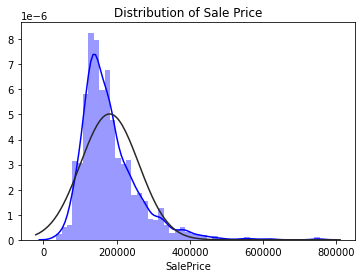

In [12]:
sns.distplot(train['SalePrice'], color='blue', fit = norm)
plt.title('Distribution of Sale Price')
plt.show()

Our target variable is positively skewed. I will use log transformation to fix this. We can also remove the outliers.

#### Log Transformation for Sale Price

In [13]:
train['SalePrice'] = np.log(train['SalePrice'])

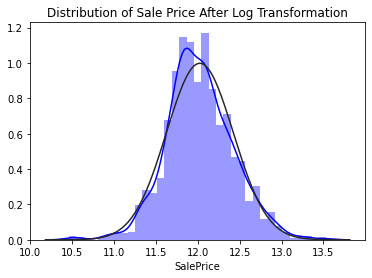

In [14]:
sns.distplot(train['SalePrice'], color='blue', fit = norm)
plt.title('Distribution of Sale Price After Log Transformation')
plt.show()

Now our target variable is more closer to normal distribution

skewness: 12.573925391549514


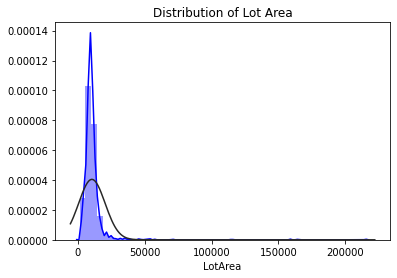

In [15]:
lot_skew = train['LotArea'].skew()
sns.distplot(train['LotArea'], color='blue', fit = norm)
plt.title('Distribution of Lot Area')
print('skewness:', lot_skew)
plt.show()

skewness: 24.46008498094565


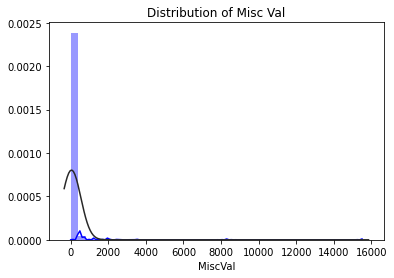

In [16]:
MsV_skew = train['MiscVal'].skew()
sns.distplot(train['MiscVal'], color='blue', fit = norm)
plt.title('Distribution of Misc Val')
print('skewness:', MsV_skew)
plt.show()

skewness: 15.948945313085376


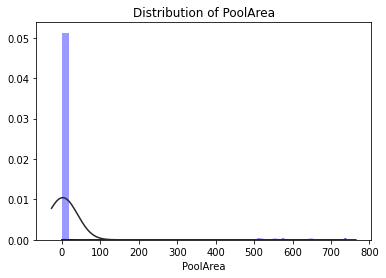

In [17]:
Pool_skew = train['PoolArea'].skew()
sns.distplot(train['PoolArea'], color='blue', fit = norm)
plt.title('Distribution of PoolArea')
print('skewness:', Pool_skew)
plt.show()

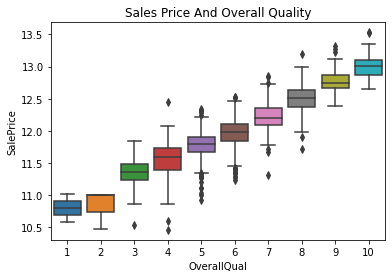

In [18]:
sns.boxplot(x = train['OverallQual'],
            y = train['SalePrice'])
plt.title('Sales Price And Overall Quality')
plt.show()

**High Quality houses have high price**

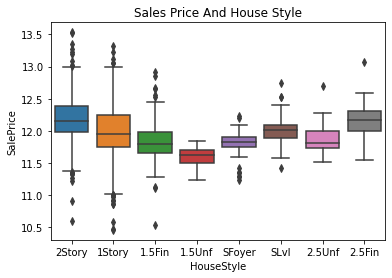

In [19]:
sns.boxplot(x = train['HouseStyle'],
            y = train['SalePrice'])
plt.title('Sales Price And House Style')
plt.show()

**Relation of HouseStyle and SalePrice is not very clear in the graph**

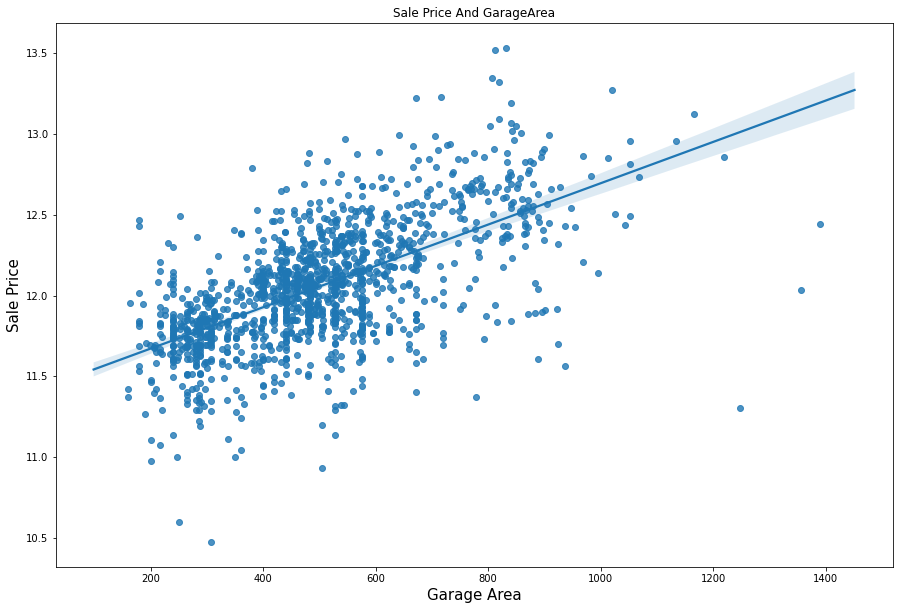

In [20]:
## Sales Price vs GarageArea (more than 0 garage area)
f, ax = plt.subplots(figsize=(15,10))
sns.regplot(data=train[train.GarageArea > 0],
           x = 'GarageArea',
           y = 'SalePrice')
plt.title('Sale Price And GarageArea')
plt.xlabel('Garage Area', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.show()

**Strong relation according to the graph**

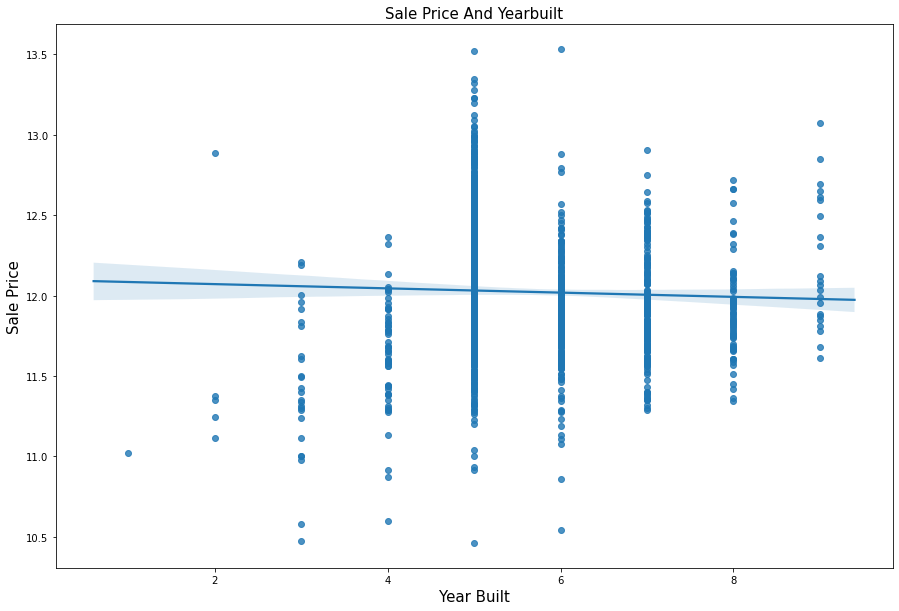

In [21]:
f, ax = plt.subplots(figsize=(15,10))
sns.regplot(data=train,
           x = 'OverallCond',
           y = 'SalePrice')
plt.title('Sale Price And Yearbuilt', fontsize = 15)
plt.xlabel('Year Built', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.show()

**Moderately strong relation**

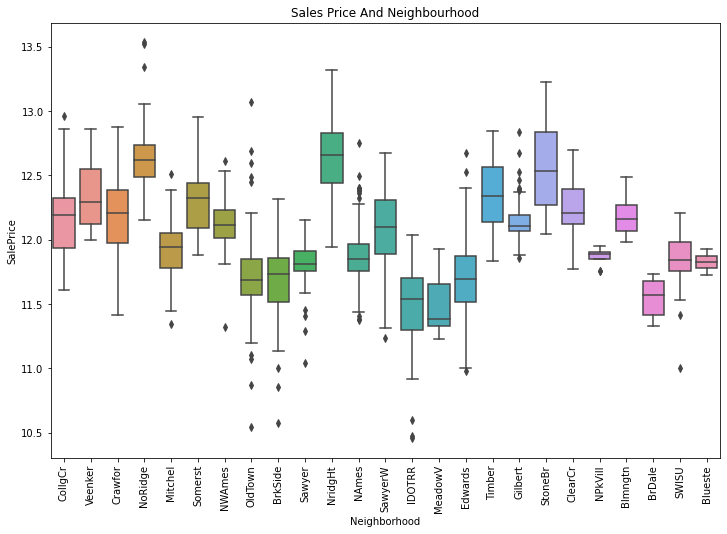

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = train['Neighborhood'],
            y = train['SalePrice'])
plt.title('Sales Price And Neighbourhood')
plt.xticks(rotation = 90)
plt.show()

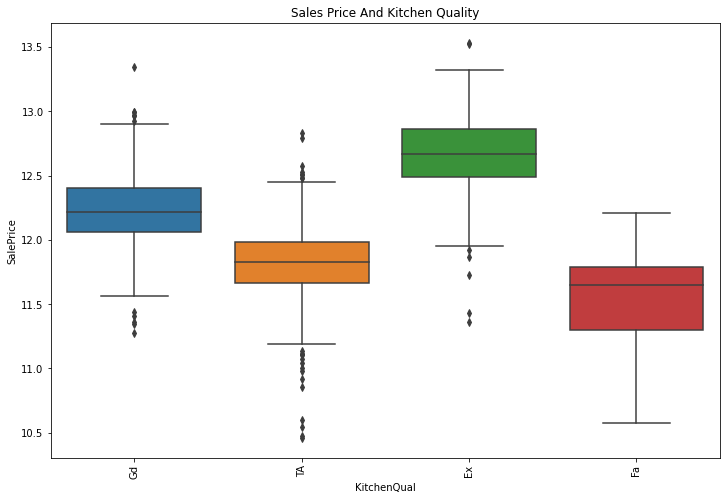

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = train['KitchenQual'],
            y = train['SalePrice'])
plt.title('Sales Price And Kitchen Quality')
plt.xticks(rotation = 90)
plt.show()

**Graph shows a significant difference between the price of different Quality Kitchen**

## Merge Data

In [24]:
train_index = train.shape[0]
test_index = test.shape[0]
y_train = train['SalePrice']
data = pd.concat((train, test)).reset_index(drop = True)
data.drop(['SalePrice'], axis = 1, inplace = True)
print(data.shape)

(2917, 79)


### Fixing Missing Values
There are alot of missing values in the dataset we saw while viewing the information about the data given in the data description. So we have to find the number of missing values and impute the values according to the data description but not every missing value is explained in the description. We will use other methods to impute the missing values for those columns

In [25]:
missing_info = data.isnull().sum()

## filter out columns with no missing values as the above function will return all columns including with 0 nas

missing_info = missing_info[missing_info > 0] 

missing_data = pd.DataFrame({'Missing Values' : missing_info})

missing_data = missing_data['Missing Values'].sort_values(ascending = False)

## Show top 5 missing values
missing_data.head()

PoolQC         2908
MiscFeature    2812
Alley          2719
Fence          2346
FireplaceQu    1420
Name: Missing Values, dtype: int64

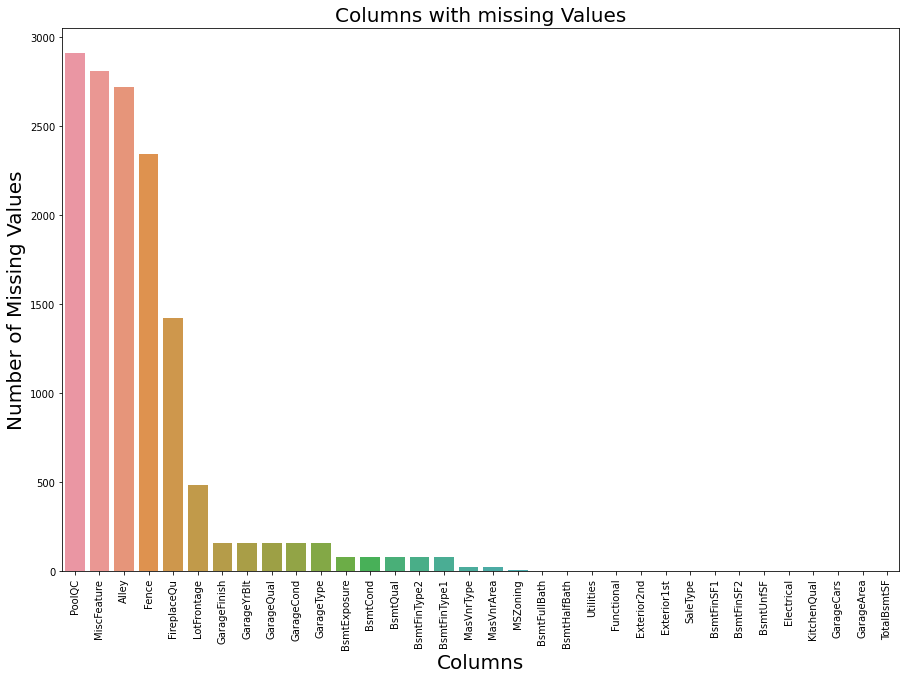

In [26]:
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(missing_data.index, missing_data)
plt.title('Columns with missing Values', fontsize = 20)
plt.xlabel('Columns', fontsize = 20)
plt.ylabel('Number of Missing Values', fontsize = 20)
plt.xticks(rotation = '90')
plt.show()

We have lots of missing values in some columns, but the information is given about the missing values, so I will impute the given values in NAs. If the information was'nt given, dropping the columns with more than 50% of the values would have been a better option.

#### Backup data
Creating backup data incase there is any mistake happens in imputation method.

In [27]:
# #Backup Data Before imputation
# data_backup = data.copy()
# data_backup.shape

### Data Description about missing values
#### Data Description: 
PoolQC : NA means No Pool,
MiscFeature : NA means None,
Alley : NA means No Alley,
Fence : NA means No Fence,
FireplaceQual : NA means No Fireplace Quality,
LotFrontage : No information about the missing values. I will impute median value grouped by Neighbourhood,
GarageYrBuilt : No information about the missing values. I will impute 0 in this case,
GarageType : NA means No No Garage Type,
GarageFinish : NA means No No Garage Finish,
GarageCond : NA means No Garage Cond,
GarageQual : NA means No Garage Quality,
BsmtQual : NA means No Basement,
BsmtCond : NA means No Basement,
BsmtExposure : NA means No Basement,
BsmtFinType2 : NA means No Basement,
BsmtFinType1 : NA means No Basement,
Functional : NA means Typical

#### Imputing None
I will fill missing values with none.
The information about some of the columns is not given so it is likely that the particular feature is not in the house.
As we have alot of variables, I will use for loop to impute missing values as it is more efficient and time saving.

In [28]:
#data = data_backup.copy()

col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
      'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
      'MasVnrType', 'MSSubClass']
for i in col:
    data[i] = data[i].fillna('None')

#### Median Imputation
I will use median imputation for the Lot frontage according to the neighbourhood which seems more appropriate option as the information is not given for this column.

In [29]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#### Imputation for the columns with no information about the missing values
For numeric columns, I will impute 0 in the missing values and mode for the categorical columns.
##### Imputing 0 


In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
           'MasVnrArea', 'GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

##### Mode Imputation
I will impute mode for the missing values in categorical columns as the information is not given in the data description

In [31]:
col = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType',
      'MSZoning']
for i in col:
    data[i] = data[i].fillna(data[i].mode()[0])

##### Imputation for Functional column and dropping utilities
Data Description says that na means typical for functional. So I will fill nas with Typ. Whereas I will drop utilities as the values are almost similar (near-zero-variance).

In [32]:
data = data.drop(['Utilities'], axis=1)

data["Functional"] = data["Functional"].fillna("Typ")

In [33]:
missing_info = data.isnull().sum()
missing_info = missing_info[missing_info > 0] ## filter out columns with no missing values
missing_data = pd.DataFrame({'Missing Values' : missing_info})
missing_data = missing_data['Missing Values'].sort_values(ascending = False)
missing_data

Series([], Name: Missing Values, dtype: int64)

We have fixed the missing values, now it is time to do some feature engineering and take care of categorical columns

### Feature Engineering
I will convert some numerical features to categorical as they are actually categories.

In [34]:
## Converting some numeric columns to categorical
data['MSSubClass'] = data['MSSubClass'].astype(str)

data['OverallCond'] = data['OverallCond'].astype(str)

data['YrSold'] = data['YrSold'].astype(str)

data['MoSold'] = data['MoSold'].astype(str)

### Label Encoding
I will manually encode values for some columns and leave the rest for sklearn label encoder. Manual label encoding will help us encode right values for right categories. Sklearn label encoder will encode values on its own and results are not the same. Everytime you use label encoding for any category, it may not encode the same value for that particular category again. So it is better to encode ordinal categories manually.

In [35]:
clean_variables = {"LotShape": {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3},
                   "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                   "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                   "BsmtQual": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "BsmtCond": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "BsmtExposure": {"None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4},
                  "BsmtFinType1": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
                  "BsmtFinType2": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
                  "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                   "FireplaceQu": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3},
                  "GarageQual": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "GarageCond": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "PoolQC": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "Fence": {"None": 0, "MnWw": 1, "GdWw": 2, "MnPrv": 3, "GdPrv": 4}}



data.replace(clean_variables, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,3,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,5,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2.0,548.0,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,3,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,5,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2.0,608.0,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,2,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,4,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3.0,642.0,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,2,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,5,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3.0,836.0,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,2008,WD,Normal


Manual encoding is done, now its time to use sklearn's label encoder for remaining categories.

In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ('Functional', 'LandSlope', 'PavedDrive', 'Street', 'Alley',
        'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))
data.head()

Shape all_data: (2917, 78)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,5,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,6,0,0,Attchd,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,None,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,5,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,3,Attchd,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,None,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,1,2,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486.0,1,0.0,434.0,920.0,GasA,5,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,6,1,3,Attchd,2001.0,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,None,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,1,2,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,4,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,6,1,4,Detchd,1998.0,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,None,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,1,2,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,5,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,6,1,3,Attchd,2000.0,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,None,0,3,2,WD,Normal


We dont have a column for total area of the house, so I will add total basement with 1st floor and 2nd floor to get the total area.

In [37]:
## Creating Total Area
data['TotalArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In order to avoid any mistakes, I will create a backup dataset again. If the results of the model is not good, I can come back to the dataset and preprocess it again with different approach.

In [38]:
# data_backup_full = data
# #data = data_backup_full.copy()

## Fix skewness
We saw that we have some distribution related problem in some of the variables.\
I will use boxcox transformation for variables with skewness higher than 0.65

In [39]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

features = data[numeric_feats].skew()
print("\nSkewness: \n")
skewness = pd.DataFrame({'Skew' :features})
skewness = skewness.sort_values(by = ['Skew'], ascending = False)
skewness.head(15)


Skewness: 



,Skew
MiscVal,21.950962
PoolQC,19.558938
PoolArea,17.697766
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
LandSlope,4.975813
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404


Majority of the columns have high skewness. In order to fix this we can use log transformation. In this case, I will use boxcox transformation to transform variables into normal shape.

In [40]:
## Get boxcox from scipy.special

from scipy.special import boxcox1p

## Transform variables with skewness higher than 0.65

skewness = skewness[abs(skewness) > 0.65]

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


skewed_columns = skewness.index

for i in skewed_columns:
    lam = 0.15
    data[i] = boxcox1p(data[i], lam)

data.head()

There are 58 skewed numerical features to Box Cox transform


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,2.885846,RL,5.831328,19.212182,0.730463,0.730463,1.540963,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,1.820334,1.540963,PConc,1.820334,1.540963,0.730463,2.259674,11.170327,0.730463,0.0,7.483296,11.692623,GasA,2.055642,0.730463,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.820334,2.602594,2.259674,0.000000,0.000000,Attchd,14.187527,1.194318,1.194318,10.506271,1.540963,1.540963,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,0,None,0.0,1.820334,1.194318,WD,Normal,14.976591
1,2.055642,RL,6.221214,19.712205,0.730463,0.730463,1.540963,Lvl,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,2.259674,2.440268,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,1.540963,1.540963,CBlock,1.820334,1.540963,1.820334,2.055642,12.062832,0.730463,0.0,8.897844,12.792276,GasA,2.055642,0.730463,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.540963,Attchd,14.145138,1.194318,1.194318,10.062098,1.540963,1.540963,1.194318,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,0,None,0.0,2.440268,0.730463,WD,Normal,14.923100
2,2.885846,RL,5.914940,20.347241,0.730463,0.730463,1.194318,Lvl,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,1.820334,1.540963,PConc,1.820334,1.540963,1.194318,2.259674,10.200343,0.730463,0.0,9.917060,11.892039,GasA,2.055642,0.730463,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.820334,2.259674,2.259674,0.730463,1.540963,Attchd,14.184404,1.194318,1.194318,10.775536,1.540963,1.540963,1.194318,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,0,None,0.0,3.011340,1.194318,WD,Normal,15.149678
3,3.011340,RL,5.684507,19.691553,0.730463,0.730463,1.194318,Lvl,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,2.440268,1.820334,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,1.540963,1.540963,BrkTil,1.540963,1.820334,0.730463,2.055642,8.274266,0.730463,0.0,10.468500,11.354094,GasA,1.820334,0.730463,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.820334,2.440268,2.259674,0.730463,1.820334,Detchd,14.179714,0.730463,1.540963,10.918253,1.540963,1.540963,1.194318,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,0,None,0.0,1.820334,0.000000,WD,Abnorml,14.857121
4,2.885846,RL,6.314735,21.325160,0.730463,0.730463,1.194318,Lvl,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,2.602594,1.820334,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,1.820334,1.540963,PConc,1.820334,1.540963,1.540963,2.259674,10.971129,0.730463,0.0,10.221051,12.510588,GasA,2.055642,0.730463,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.820334,2.750250,2.259674,0.730463,1.540963,Attchd,14.182841,1.194318,1.540963,11.627708,1.540963,1.540963,1.194318,8.013884,6.314735,0.000000,0.0,0.0,0.0,0.0,0,None,0.0,1.540963,1.194318,WD,Normal,15.852312


We still have to take care of some categorical variables. So we will get dummy variables from pandas get_dummy.

## Get Dummy Variables

In [41]:
final_data = pd.get_dummies(data)

print(final_data.shape)
final_data.head()

(2917, 224)


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,TotalArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_0,Fence_1,Fence_3,Fence_4,Fence_GdWo,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.820334,1.540963,1.820334,1.540963,0.730463,2.259674,11.170327,0.730463,0.0,7.483296,11.692623,2.055642,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.820334,2.602594,2.259674,0.000000,0.000000,14.187527,1.194318,1.194318,10.506271,1.540963,1.540963,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,0.0,1.820334,1.194318,14.976591,0,

**Now our data is ready for modelling**

## Split the data

In [42]:
train = final_data[:train_index]
test = final_data[train_index:]

print('train data : {}'.format(train.shape))
print('test data : {}'.format(test.shape))
train.head()

train data : (1458, 224)
test data : (1459, 224)


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,TotalArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_0,Fence_1,Fence_3,Fence_4,Fence_GdWo,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.820334,1.540963,1.820334,1.540963,0.730463,2.259674,11.170327,0.730463,0.0,7.483296,11.692623,2.055642,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.820334,2.602594,2.259674,0.000000,0.000000,14.187527,1.194318,1.194318,10.506271,1.540963,1.540963,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,0.0,1.820334,1.194318,14.976591,0,

Now our data is cleaned and ready for modeling. I will use multiple models and stacked them together

## Data Modelling

In [43]:
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

### KFold validation 
I will use cross validation in order to check the performance of our model. We can also create validation dataset. 

In [44]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Defining All the models
I will create pipelines and use RobustScaler which will deal with the outliers.

In [45]:
model_lm = make_pipeline(RobustScaler(), LinearRegression())

rmse_lm = rmsle_cv(model_lm).mean()

print("Root Mean Squared Log-Error (Linear Regression): {:.5f}".format(rmse_lm))

Root Mean Squared Log-Error (Linear Regression): 0.12713










#### Lasso Regression



In [46]:
## Lasso Regression
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

rmse_lasso = rmsle_cv(model_lasso).mean()

print("Root Mean Squared Log-Error (Lasso Regression): {:.5f}".format(rmse_lasso))

Root Mean Squared Log-Error (Lasso Regression): 0.11349


#### Kernel Ridge

In [47]:
## Kernel Rigde
model_KRR = KernelRidge(alpha=0.9, kernel='polynomial', degree=2,coef0=4.5)


rmse_KKR = rmsle_cv(model_KRR).mean()

print("Root Mean Squared Log-Error (KKR): {:.5f}".format(rmse_KKR))

Root Mean Squared Log-Error (KKR): 0.11537


A bit higher error rate in Kernel Ridge.

#### Elastic Net

In [48]:
## Elastic Net
model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.95, random_state=3))


rmse_Enet = rmsle_cv(model_ENet).mean()
print("Root Mean Squared Log-Error (Enet): {:.5f}".format(rmse_Enet))

Root Mean Squared Log-Error (Enet): 0.11350


The result of elastic net is almost equal to lasso regression

#### SVR

In [49]:
##SVR
model_svr = make_pipeline(RobustScaler(), SVR(degree = 2, coef0 = 3.5, kernel = 'poly', C = 2.5))

rmse_svr = rmsle_cv(model_svr).mean()

print("Root Mean Squared Log-Error (SVR): {:.5f}".format(rmse_svr))

Root Mean Squared Log-Error (SVR): 0.11765


#### Gradient Boosting

In [50]:
## Gradient boosting
model_gbr = GradientBoostingRegressor(n_estimators=3000, 
                                   learning_rate=0.05,
                                   max_depth=4,
                                   max_features='sqrt',
                                   min_samples_leaf=15,
                                   min_samples_split=10, 
                                   loss='huber',
                                   random_state = 42)

rmse_gbr = rmsle_cv(model_gbr).mean()

print("Root Mean Squared Log-Error (GBR): {:.5f}".format(rmse_gbr))

Root Mean Squared Log-Error (GBR): 0.11603


#### Extreme Gradient Boosting

In [51]:
## Extreme Gradient Boosting
model_xgb = xgb.XGBRegressor(max_depth = 3,
                            learning_rate = 0.03,
                            objective = 'reg:squarederror',
                            min_child_weight = 1,
                            colsample_bytree = 1,
                            subsample = 0.5,
                            gamma = 0,
                            booster = 'gbtree',
                            n_estimators = 1500,
                            reg_alpha = 0.2,
                            reg_lambda = 1,
                            )



rmse_xgb = rmsle_cv(model_xgb).mean()

print("Root Mean Squared Log-Error (Xgboost): {:.5f}".format(rmse_xgb))

Root Mean Squared Log-Error (Xgboost): 0.11393


#### Light Gradeint Boosting

In [52]:
## Light Gradient Boosting
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=5,
                              learning_rate=0.05,
                              n_estimators=800,
                              max_bin = 55,
                              bagging_fraction = 0.8,
                              bagging_freq = 5,
                              feature_fraction = 0.2, #0.2319,
                              feature_fraction_seed = 9,
                              bagging_seed = 9,
                              min_data_in_leaf = 5,
                              min_sum_hessian_in_leaf = 6)


rmse_lgb = rmsle_cv(model_lgb).mean()

print("Root Mean Squared Log-Error (LightGBM): {:.5f}".format(rmse_lgb))

Root Mean Squared Log-Error (LightGBM): 0.11361


### Stacking models
In order to get better results, I will combine all the models above and stacked them together with stackingcvregressor function.

In [ ]:
stacked_models = StackingCVRegressor(regressors = (model_ENet, model_gbr, model_KRR, model_xgb, model_lgb, model_svr, model_lm),
                                        meta_regressor = model_lasso,
                                        use_features_in_secondary = True)

stacked = rmsle_cv(stacked_models).mean()

print("Root Mean Squared Log-Error (Stacked_models): {:.5f}".format(stacked))

Individual models had higher error rate. We can clearly see the performance of stacked model. With additional models and otimized hyperparameter tuning, we can get better results.

In [ ]:
stacked_models.fit(np.array(train),y_train)
pred = np.exp(stacked_models.predict(np.array(test)))
pred

In [ ]:
submission = pd.read_csv('submission.csv')
submission['SalePrice'] = pred
submission.to_csv('stacked.csv', index = False)

Our final model result on kaggle is 0.1161.With grid search CV from sklearn, we can get better results.